In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dc_stat_think as dcst
import numpy as np

In [109]:
df=pd.read_csv('earthquakes.csv',parse_dates=['time'],index_col='time')
print(df.columns)


Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'gap', 'dmin',
       'rms', 'id', 'place'],
      dtype='object')


(array([18262., 18322., 18383., 18444., 18506., 18567., 18628., 18687.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

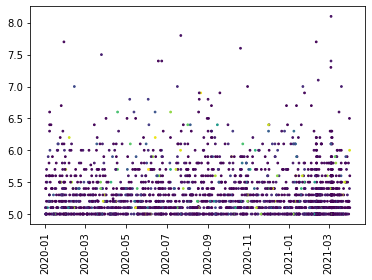

In [110]:
plt.scatter(data=df,x=df.index,y='mag',c='depth',s=3)
plt.xticks(rotation=90)

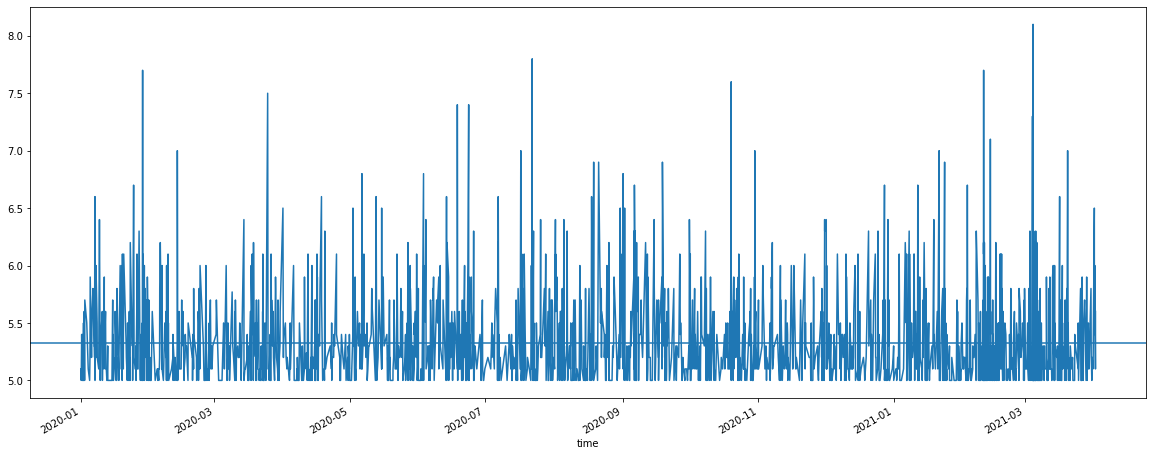

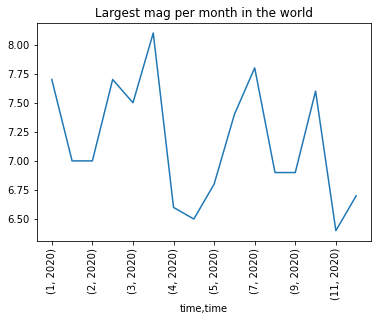

In [95]:
#grouped=df.groupby(df.index)['mag'].agg({'min','max'})
#print(grouped)
#grouped.plot()
mean_mag=df['mag'].mean()
plt.figure(figsize=(20,8))
df['mag'].plot()
plt.axhline(mean_mag)
plt.show()


grouped=df.groupby(by=[df.index.month, df.index.year])['mag'].max()
grouped.plot()
plt.xticks(rotation=90)
plt.title('Largest mag per month in the world')
plt.show()


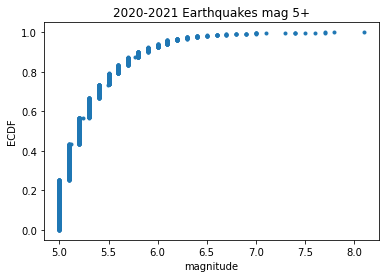

In [60]:
mags=df['mag']
# Make the plot
plt.plot(*dcst.ecdf(mags),marker='.',linestyle='none')

# Label axes and show plot

plt.xlabel('magnitude')
plt.ylabel('ECDF')
plt.title('2020-2021 Earthquakes mag 5+')
plt.show()



In [106]:
mean_earthquake=np.mean(df['mag'])
bs_earthquake = dcst.draw_bs_reps(df['mag'], np.mean, size=10000)

conf_int_earthquake = np.percentile(bs_earthquake, [2.5,97.5])

#print(conf_int_earthquake[0],conf_int_earthquake[1])
# Print the results
print("earthquake mag mean {} confidence interval[{} {}]".format(mean_earthquake, conf_int_earthquake[0],conf_int_earthquake[1]))

earthquake mag mean 5.328070017953322 confidence interval[5.312243940754073 5.344605251346528]


In [61]:
def b_value(mags,mt,perc=[2.5,97.5],n_reps=None):
    """Compute the b-value and optionally its confidence interval."""
    # Extract magnitudes above completeness threshold: m
    m = mags[mags >= mt]

    # Compute b-value: b
    b = (np.mean(m)-mt) * np.log(10)

    # Draw bootstrap replicates
    if n_reps is None:
        return b
    else:
        m_bs_reps = dcst.draw_bs_reps(m,np.mean,size=n_reps)

        # Compute b-value from replicates: b_bs_reps
        b_bs_reps = (m_bs_reps - mt) * np.log(10)

        # Compute confidence interval: conf_int
        conf_int = np.percentile(b_bs_reps,perc)
    
        return b, conf_int


theortical versus ecdf of earthquakes


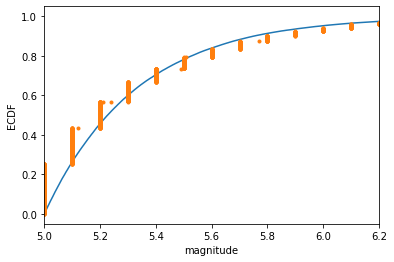


b-value: 0.76
95% conf int: [0.72, 0.79]

The b-value of about 1 is typical for regions along fault zones.


In [154]:
print('theortical versus ecdf of earthquakes')
mt=5
# Compute b-value and confidence interval
b, conf_int = b_value(mags, mt, perc=[2.5, 97.5], n_reps=10000)

# Generate samples to for theoretical ECDF
m_theor = np.random.exponential(b/np.log(10), size=100000) + mt

# Plot the theoretical CDF
_ = plt.plot(*dcst.ecdf(m_theor))

# Plot the ECDF (slicing mags >= mt)
_ = plt.plot(*dcst.ecdf(mags[mags >= mt]), marker='.', linestyle='none')

# Pretty up and show the plot
_ = plt.xlabel('magnitude')
_ = plt.ylabel('ECDF')
_ = plt.xlim(5, 6.2)
plt.show()

# Report the results
print("""
b-value: {0:.2f}
95% conf int: [{1:.2f}, {2:.2f}]""".format(b, *conf_int))

print("\nThe b-value of about 1 is typical for regions along fault zones.")

In [157]:
events=df[df.mag >7]
print(events.shift(periods=3,axis=0).index)

#for key, item in events.iterrows():
#    print(key)
#    print("previous",item['previous_event'])

DatetimeIndex(['2021-03-04 19:28:33.176000+00:00',
               '2020-07-22 06:12:44.810000+00:00',
               '2021-02-10 13:19:55.531000+00:00',
               '2020-01-28 19:10:24.918000+00:00',
               '2020-10-19 20:54:38.950000+00:00',
               '2020-03-25 02:49:21.160000+00:00',
               '2021-03-04 17:41:23.379000+00:00',
               '2020-06-23 15:29:04.350000+00:00',
               '2020-06-18 12:49:53.844000+00:00',
               '2021-03-04 13:27:35.784000+00:00',
               '2021-02-13 14:07:50.194000+00:00'],
              dtype='datetime64[ns, UTC]', name='time', freq=None)
